# **Restaurant Recommender System**

*By Varnica Sharma*

### Importing the Required Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
sns.set_style('darkgrid')

In [2]:
res = pd.read_csv("drive/MyDrive/restaurant-recommender-system/zomato.csv")

### Pre-processing the Data

In [3]:
res.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
res.shape

(51717, 17)

In [6]:
print(round((res.isnull().sum()*100/len(res)),2).sort_values(ascending=False))

dish_liked                     54.29
rate                           15.03
phone                           2.34
approx_cost(for two people)     0.67
rest_type                       0.44
cuisines                        0.09
location                        0.04
listed_in(type)                 0.00
menu_item                       0.00
reviews_list                    0.00
url                             0.00
address                         0.00
votes                           0.00
book_table                      0.00
online_order                    0.00
name                            0.00
listed_in(city)                 0.00
dtype: float64


In [7]:
res.dropna(how='any', inplace=True)

In [8]:
res.duplicated().sum()

0

In [9]:
res = res.rename(columns={"approx_cost(for two people)":"cost","listed_in(type)":"type","listed_in(city)":"city"})
res.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

## Top 20 restaurants in Bangalore

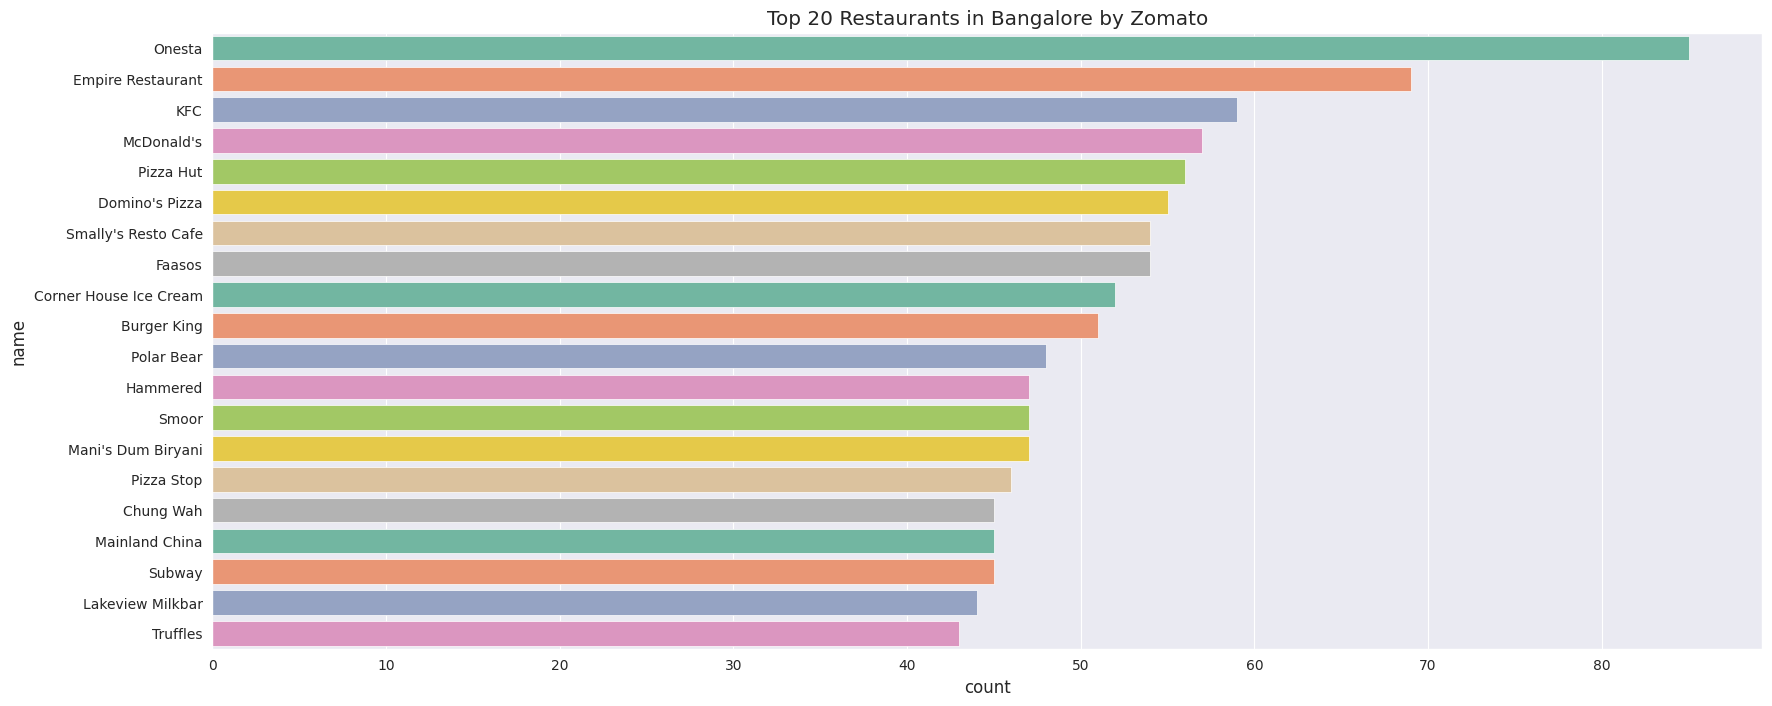

In [10]:
top_20_res = res["name"].value_counts(ascending=False)[:20]

plt.figure(figsize=(20,8))
sns.countplot(y="name", data=res, order=top_20_res.index, palette="Set2")
plt.title("Top 20 Restaurants in Bangalore by Zomato");

In [11]:
res["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [12]:
# Removing /5 from rates
res = res.loc[res.rate!="NEW"]
res = res.loc[res.rate!="-"].reset_index(drop=True)
remove_slash = lambda x: x.replace("/5", "") if type(x) == np.str else x
res.rate = res.rate.apply(remove_slash).str.strip().astype("float")
res["rate"].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [13]:
res.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
dtype: int64

In [14]:
rests = list(res['name'].unique())
res['Mean Rating'] = 0

for i in range(len(rests)):
    res['Mean Rating'][res['name']==rests[i]] = res['rate'][res['name']==rests[i]].mean()

In [15]:
res.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.118182
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.100000
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.800000
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.700000
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,3.800000


In [16]:
scaler = MinMaxScaler(feature_range=(1,5))
res[['Mean Rating']] = scaler.fit_transform(res[['Mean Rating']]).round(2)
res.sample(5)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,Mean Rating
14945,https://www.zomato.com/bangalore/punjab-bistro...,"1, SJR Primus, Adjacent Raheja Arcade, Koraman...",Punjab Bistro,Yes,Yes,4.4,459,080 40902161\n080 40902162,Koramangala 7th Block,"Casual Dining, Bar","Chicken Shorba, Paneer Tikka Masala, Cocktails...",North Indian,"1,500","[('Rated 4.0', 'RATED\n I had been to this fi...",[],Dine-out,Koramangala 6th Block,4.29
19658,https://www.zomato.com/bangalore/plan-b-brigad...,"20, Castle Street, Ashok Nagar, Brigade Road, ...",Plan B,No,No,4.1,4445,+91 8880022737,Brigade Road,"Casual Dining, Pub","Burgers, Beer, Veg Lasagna, Peri Peri Chicken ...","American, Continental, BBQ, Steak","1,200","[('Rated 4.0', 'RATED\n Centrally located\nGo...",[],Pubs and bars,MG Road,4.02
20067,https://www.zomato.com/bangalore/hongkong-gard...,"Shop 2, Sapthagiri Complex, Maruti Nagar exten...",Hongkong Garden,Yes,No,3.9,310,080 49652110,Kaggadasapura,Casual Dining,"Spring Roll, Chop Suey, Manchow Soup, American...","Chinese, Thai, Seafood, Momos",500,"[('Rated 2.0', 'RATED\n Has anyone ever tried...",[],Delivery,Old Airport Road,3.71
20674,https://www.zomato.com/bangalore/agent-jacks-b...,"1136, HAL 2nd Stage, 100 Feet Road, Indiranaga...",Agent Jack's Bar,No,Yes,4.1,597,080 49653212,Indiranagar,Bar,"Margarita, Masala Peanuts, Cocktails, Momos, P...","Continental, North Indian, Italian","1,300","[('Rated 5.0', ""RATED\n Ended up dining here ...",[],Pubs and bars,Old Airport Road,3.87
3540,https://www.zomato.com/bangalore/kailash-parba...,"1st Floor, Inorbit Mall, Whitefield, Bangalore",Kailash Parbat,No,No,2.6,84,+91 8884290875\r\n+91 9844897863,Whitefield,Food Court,"Chaat, Gulab Jamun, Raj Kachori, Chole, Bhel P...",North Indian,400,"[('Rated 3.0', 'RATED\n I would say its ok. N...",[],Dine-out,Brookefield,2.75


In [17]:
res_df = res[res["Mean Rating"]>=3].sort_values("Mean Rating", ascending=False).head(500)

In [18]:
res_df = res_df.merge(res,on="name").drop_duplicates("name")

In [19]:
res_df = res_df.merge(res,on="name").drop_duplicates("name")[["name", "location", "city", "cuisines", "cost", "type", "url", "rate", "Mean Rating"]]

In [20]:
res_df.head()

,name,location,city,cuisines,cost,type,url,rate,Mean Rating
0,Asia Kitchen By Mainland China,Koramangala 5th Block,BTM,"Asian, Chinese, Thai, Momos","1,500",Buffet,https://www.zomato.com/bangalore/asia-kitchen-...,4.9,5.00
19,Byg Brewski Brewing Company,Sarjapur Road,Bellandur,"Continental, North Indian, Italian, South Indi...","1,600",Delivery,https://www.zomato.com/bangalore/byg-brewski-b...,4.9,5.00
25,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,Indiranagar,Old Airport Road,"Healthy Food, Salad, Mediterranean","1,000",Dine-out,https://www.zomato.com/bangalore/sant%C3%A9-sp...,4.9,5.00
26,Punjab Grill,Whitefield,Brookefield,North Indian,"2,000",Delivery,https://www.zomato.com/bangalore/punjab-grill-...,4.9,4.96
33,Belgian Waffle Factory,Brigade Road,Brigade Road,Desserts,400,Delivery,https://www.zomato.com/bangalore/belgian-waffl...,4.9,4.93


In [21]:
x = res.groupby('cuisines').count()['rate'] > 3
cuisines = x[x].index

In [22]:
ratings = res[res['cuisines'].isin(cuisines)]

In [23]:
y = ratings.groupby('name').count()['rate']>=4
famous = y[y].index

In [24]:
final_ratings = ratings[ratings['name'].isin(famous)]

In [25]:
pt = final_ratings.pivot_table(index="name", columns="cuisines", values="rate")

In [26]:
pt.fillna(0, inplace=True)

In [27]:
pt

cuisines,"African, Burger",American,"American, Asian, Continental, North Indian, South Indian, Chinese","American, Asian, European, North Indian","American, BBQ","American, Burger, Fast Food","American, Cafe, Continental","American, Cafe, Continental, French, Burger, Mexican, Desserts, Pizza","American, Chinese, Continental, North Indian","American, Continental",...,"Thai, Vietnamese, Asian, Chinese",Tibetan,"Tibetan, Chinese, Continental, Momos","Tibetan, Chinese, Momos","Tibetan, Momos","Tibetan, Nepalese, Momos","Turkish, Desserts","Turkish, Rolls",Vietnamese,"Vietnamese, Thai, Burmese, Japanese"
name,,,,,,,,,,,,,,,,,,,,,
#L-81 Cafe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000 B.C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1131 Bar + Kitchen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12th Main - Grand Mercure,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1441 Pizzeria,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zoey's,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zyara,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eat.fit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
similarity_scores = cosine_similarity(pt)

In [29]:
similarity_scores.shape

(2143, 2143)

In [33]:
def recommend(res_name):
    index = np.where(pt.index==res_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])),key=lambda x:x[1],reverse=True)[1:6]

    data = []
    for i in similar_items:
        item = []
        temp_df = res[res["name"] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates("name")["name"].values))
        item.extend(list(temp_df.drop_duplicates("name")["cuisines"].values))
        item.extend(list(temp_df.drop_duplicates("name")["url"].values))

        data.append(item)
    return data

In [35]:
recommend("Truffles")

[['#L-81 Cafe',
  'Fast Food, Beverages',
  'https://www.zomato.com/bangalore/l-81-cafe-hsr-bangalore?context=eyJzZSI6eyJlIjpbIjE4NjcxMDYzIiwiMTg2NzkwODYiLCIxODY5MzMxNCIsIjE4NzE1NjEzIiwxODcxNTcwMCwiMTg3MDc1ODAiLCIxODcyNzExMiIsIjE4NzQ3MzIxIiwiMTg3MjM0NDAiLCIxODczNjUzMSIsIjE4NzA5NTEyIiwiMTg3NTE5NjgiLCIxODk0ODkwOCIsIjE4OTUxODAxIiwiMTg1NTEyNjAiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJUTSJ9fQ=='],
 ['1000 B.C',
  'Arabian, Sandwich, Rolls, Burger',
  'https://www.zomato.com/bangalore/1000-b-c-koramangala-5th-block-bangalore?context=eyJzZSI6eyJlIjpbIjE4ODg2NjI5IiwiMTg2ODkxNzAiLCIxODg3NDMwMyIsIjE4Mzg1NDQzIiwxODgxMTExNCwiMTg4ODYxMzkiLCIxODM2NjY4MCIsIjE4NDc2NDc3IiwiMTg4MjI1OTciLCIxODg5NTUwNCIsIjE4NjE1NzkzIiwiMTg3NjI1MTEiLCIxODYyMjg5OSIsIjU5OTQ0IiwiMTg4MjQ4ODEiXSwidCI6IkRlbGl2ZXJ5IFJlc3RhdXJhbnRzIGluIEJUTSJ9fQ=='],
 ['1131 Bar + Kitchen',
  'Continental, Asian, Italian, North Indian',
  'https://www.zomato.com/bangalore/1131-bar-kitchen-indiranagar-bangalore?context=eyJzZSI6eyJlIjpbIjE4NDA3OTE

In [37]:
import pickle
pickle.dump(res_df, open("popular.pkl", "wb"))
pickle.dump(pt, open("pt.pkl", "wb"))
pickle.dump(res_df, open("res.pkl", "wb"))
pickle.dump(similarity_scores, open("similarity_scores.pkl", "wb"))